In [1]:
import pandas as pd
import numpy as np
import statsmodels as sm

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_np = np.load(r'./ihb.npy')

In [3]:
df = pd.DataFrame(np.vstack(data_np))

In [4]:
id_atlas1 = []
id_atlas2 = []

for i in range(3200):
    if np.isnan(df[245].iloc[i]):
        id_atlas1.append(i)
    else:
        id_atlas2.append(i)

In [5]:
df.reset_index(inplace=True)

In [6]:
df

,index,0,1,2,3,4,5,6,7,8,...,236,237,238,239,240,241,242,243,244,245
0,0,-1.208052,0.111388,-0.234515,0.365944,1.505549,1.324777,-0.949294,-0.981606,-1.149822,...,-0.008398,-0.666859,-0.404910,1.577314,0.932081,3.574245,0.330343,0.478111,-0.223376,0.160501
1,1,-0.915837,-0.057048,0.511540,0.781743,1.558478,0.961867,-0.126753,-0.710880,-1.316857,...,1.396400,1.300589,1.333351,-0.501504,1.136577,-0.884366,-0.790708,-0.574696,1.369067,0.410754
2,2,-0.582438,-1.577662,0.338893,0.197674,0.735043,-0.172094,-0.605576,-1.067815,-0.848858,...,1.135954,1.216705,-0.124612,0.942561,0.426223,4.031010,0.573941,0.400540,0.242438,-0.772603
3,3,-0.747026,0.292558,0.922897,-0.258845,-0.074963,-0.482179,0.142362,0.551713,0.289270,...,1.051556,-0.344078,1.335560,0.012342,1.175615,-1.975364,0.681590,0.986855,0.558985,0.978780
4,4,0.407839,-0.309661,-0.479574,-0.539283,-1.598734,-1.003921,-0.069735,-0.530460,0.433597,...,-1.200290,-0.567984,-0.263202,0.141729,1.996897,-2.837874,1.073735,0.667195,-0.093897,0.640725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3195,3195,-0.845763,0.012679,-0.025379,0.408195,0.898629,0.175687,0.836349,-0.613925,-0.529215,...,-0.260128,2.155111,0.336083,-0.066854,-1.493574,-1.022727,0.071023,-2.322239,-0.558710,-0.233542
3196,3196,0.908955,0.124355,0.173386,0.375466,-0.016855,0.367684,0.224644,-0.314921,0.512813,...,0.305411,-1.428395,0.813462,0.218313,-0.153903,0.484773,0.537720,-0.023403,0.114202,-0.238301
3197,3197,-0.899009,-1.494773,0.048236,-0.492600,-0.932645,-0.480540,0.137507,-0.231230,-1.158689,...,0.051051,0.263559,-0.035067,0.967959,-0.249472,0.267010,0.614543,-0.623076,0.474932,0.302466
3198,3198,0.917175,0.590787,-0.426984,-0.919063,-0.339765,-0.154635,-0.123620,-0.098092,0.730550,...,1.671392,-1.013786,-0.945832,-0.269392,0.536383,1.477129,-0.643145,0.230391,-0.279614,-0.113156


In [7]:
df_with_nan = df[df.isna().any(axis=1)].copy()  # DataFrame с NaN
df_without_nan = df[~df.isna().any(axis=1)].copy()

In [8]:
df_with_nan = df.drop([i for i in range(200,246)], axis=1)

In [9]:
df_with_nan = df_with_nan.drop(id_atlas2,axis = 0)

In [10]:
df_without_nan.drop('index', axis = 1,inplace=True)
df_with_nan.drop('index', axis = 1,inplace=True)
df_with_nan

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
10,1.023895,-0.176682,-0.811669,0.536139,-2.515479,2.121760,1.785636,-0.711601,-0.607609,1.411412,...,0.043493,0.244985,0.003254,-0.762333,-2.212562,-0.543139,-1.638934,0.620223,-1.204378,-0.052519
11,-0.929717,-0.322515,-0.705983,-1.975086,1.490381,-1.202225,-0.313915,-0.233086,0.432752,-0.940389,...,-1.717170,-0.173238,0.451710,0.069003,-0.392096,0.051546,-0.656602,-0.199138,-0.473937,-0.199703
12,-0.341629,0.131138,0.155059,0.745065,-0.315335,-1.253238,0.331082,0.023791,-0.780040,1.752312,...,0.621228,1.196949,-0.652698,1.037204,1.040373,1.061813,1.245755,1.618342,1.089889,0.205204
13,1.711881,2.160387,1.777172,1.382157,3.139590,1.597457,1.912726,0.676146,1.593602,1.559462,...,1.387639,0.336699,0.025700,-0.003658,-0.467651,-0.576101,-0.269088,2.053298,0.097042,0.414169
14,0.568950,-0.043495,0.678210,0.901174,1.135003,0.339475,-0.919318,0.860605,0.604444,-0.300989,...,-3.150525,-2.158298,-0.350300,-1.016435,0.423600,-0.693803,0.353542,-0.463910,1.297040,0.685382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3185,-0.588822,-0.701177,-0.576556,-0.475991,-1.615566,0.855666,-0.862559,-0.338000,-0.340812,-0.644001,...,0.363303,0.384910,0.106555,-0.991261,-1.782958,-0.214089,-1.376996,-1.492860,-0.917963,-1.438078
3186,0.305583,-0.544903,-0.867562,-0.596519,-0.343004,1.607527,0.179306,-0.226929,-0.345255,0.767960,...,0.686904,0.631937,-0.143940,1.199992,1.668142,0.423933,1.415170,1.817624,1.329383,2.017529
3187,-0.528072,0.062244,1.137930,-0.149651,0.631545,-0.947695,0.287410,0.682996,-0.156513,-0.336837,...,-1.468656,-1.535458,-1.277127,-0.102608,1.732966,1.587565,0.838632,-2.088158,-0.390097,0.213473
3188,0.694622,0.362979,0.005653,1.195485,-0.425003,0.054787,0.616057,0.267031,0.425677,0.420645,...,-0.349298,-0.678259,-0.532298,-0.982517,-0.326822,-1.130645,-0.237658,-0.754260,-0.670364,-2.251999


In [12]:
columns_without = []
for j in range(246):  # Номера последовательностей от 1 до 246
    for i in range(1, 11):  # Номера элементов от 1 до 10
        # Формирование строки и добавление в список
        columns_without.append(f"{j}t{i}")

columns_with = []
for j in range(200):  # Номера последовательностей от 1 до 246
    for i in range(1, 11):  # Номера элементов от 1 до 10
        # Формирование строки и добавление в список
        columns_with.append(f"{j}t{i}")

In [13]:
df_test_without = pd.DataFrame(np.zeros((160, 246*10)), columns = columns_without)

In [15]:
df_test_without

,0t1,0t2,0t3,0t4,0t5,0t6,0t7,0t8,0t9,0t10,...,245t1,245t2,245t3,245t4,245t5,245t6,245t7,245t8,245t9,245t10
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
for i in range(246):
    df_test_without[str(i)+'t1'].loc[0] = df_without_nan[i].iloc[0]

for i in range(1,1600):
    for j in range(246):
        if i%10+1 == 1 :
            df_test_without[str(j)+'t' + str(i%10+1)].iloc[i//10] = df_without_nan[j].iloc[i]
        else:
            df_test_without[str(j)+'t' + str(i%10+1)].iloc[i//10] = df_without_nan[j].iloc[i] + df_test_without[str(j)+'t' + str((i-1)%10+1)].iloc[(i-1)//10]

In [24]:
df_test_without

,0t1,0t2,0t3,0t4,0t5,0t6,0t7,0t8,0t9,0t10,...,245t1,245t2,245t3,245t4,245t5,245t6,245t7,245t8,245t9,245t10
0,-1.208052,-2.123889,-2.706327,-3.453353,-3.045514,-3.784531,-3.187369,-2.587870,-2.793418,-2.006657,...,0.160501,0.571255,-0.201348,0.777432,1.418157,2.095387,2.513842,2.602485,1.451867,0.189998
1,0.817854,0.478703,1.646892,3.321363,2.605930,2.465113,3.607605,3.482535,3.484037,3.885697,...,0.264502,0.206375,-0.114344,1.581691,2.127544,1.911552,2.028969,2.015156,2.322199,1.990372
2,-0.373658,-1.149525,-1.544591,-0.327281,-0.293179,0.172414,0.400614,-0.878363,0.623846,1.203037,...,0.220079,-1.529825,-0.699460,0.447775,2.031864,1.577437,2.131370,2.109056,2.905545,3.343591
3,-0.359192,-0.827238,-0.397050,-0.660425,-1.189028,-0.423773,-0.315422,-1.674474,-1.031872,-1.471216,...,1.016123,0.905019,1.607876,1.710684,2.552692,1.879669,1.504240,0.671289,1.459013,2.339115
4,-0.639950,-0.895193,-1.336635,-2.138198,-1.514733,-1.143057,-1.068718,-1.545541,-0.767399,0.291527,...,-0.312562,-0.034969,0.682571,0.527362,0.319989,0.754165,1.943841,2.496193,2.713418,2.565513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,0.184778,0.988173,-1.184378,-1.100732,-1.902950,-0.474035,-0.993225,-0.422197,-0.495590,-1.750477,...,1.553316,0.972374,1.214914,0.580918,0.873858,0.036014,-0.366109,0.326025,-0.147901,-0.422402
156,-0.338648,-0.635309,-1.902979,-1.565745,-2.643280,-1.761857,-2.238372,-1.352329,-2.314844,-1.843696,...,0.283122,-0.276452,-0.146549,0.169609,1.000778,0.499356,0.998107,-0.380538,-0.134359,0.002106
157,0.103149,0.179266,-0.141458,-1.307123,-2.196738,-1.913674,-1.720638,-1.568614,-0.488693,-1.168764,...,0.147151,0.580738,-0.036646,-1.139577,-1.254150,-1.945214,-1.450648,-1.568596,-1.942470,-0.715662
158,1.681661,1.944038,2.027813,3.158926,2.656292,2.756537,3.578457,3.236168,2.670039,1.902984,...,0.705863,1.520958,1.386413,1.467453,1.267159,0.091682,1.071051,0.912733,1.621445,0.760994


In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [49]:
from sklearn.mixture import GaussianMixture

In [55]:
gmm = GaussianMixture(n_components=20, random_state=42)  # Укажите количество кластеров
gmm.fit(scaled_test_without)

labels = gmm.predict(scaled_test_without)

In [56]:
scaler = StandardScaler()
scaler.fit(df_test_without)
scaled_test_without = scaler.transform(df_test_without)

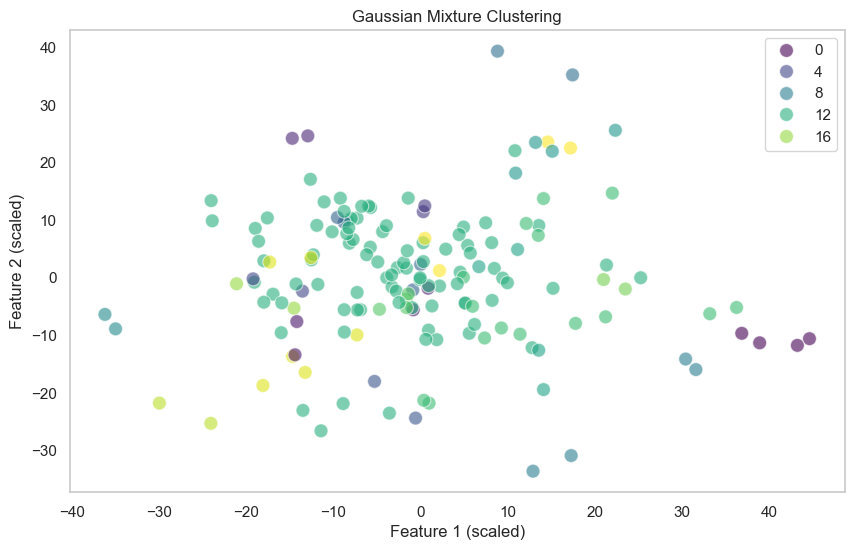

In [57]:
pca = PCA(n_components=2)  # Уменьшаем до 2D для визуализации
X_pca = pca.fit_transform(scaled_test_without)

# Построить график
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis', s=100, alpha=0.6)
plt.title('Gaussian Mixture Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.grid()
plt.show()

In [31]:
from sklearn.manifold import TSNE

In [33]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(scaled_test_without)

/var/folders/b3/llqtv04j63gc6h4qmt3dftt80000gn/T/ipykernel_38924/1967998811.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], palette='viridis', s=100)


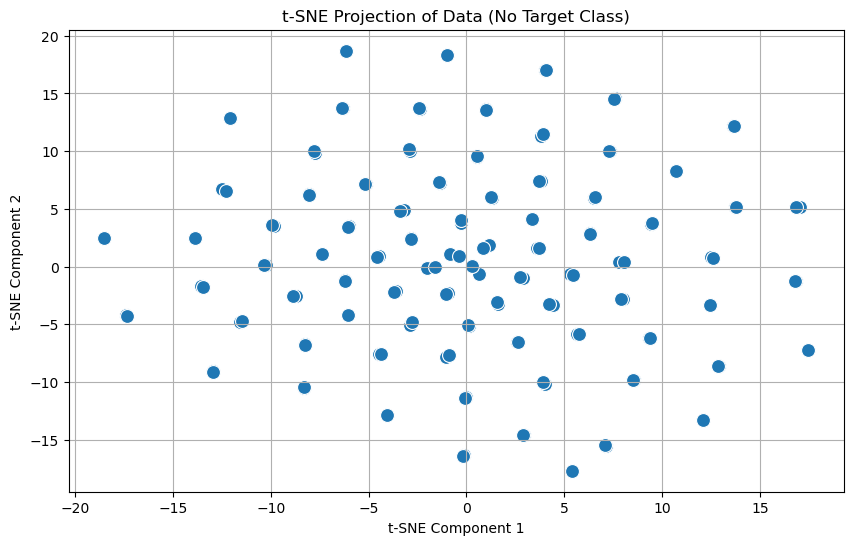

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], palette='viridis', s=100)
plt.title('t-SNE Projection of Data (No Target Class)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.grid()
plt.show()

In [38]:
gmm = GaussianMixture(n_components=20, random_state=42)  # Укажите количество кластеров
gmm.fit(scaled_test_without)

labels = gmm.predict(scaled_test_without)

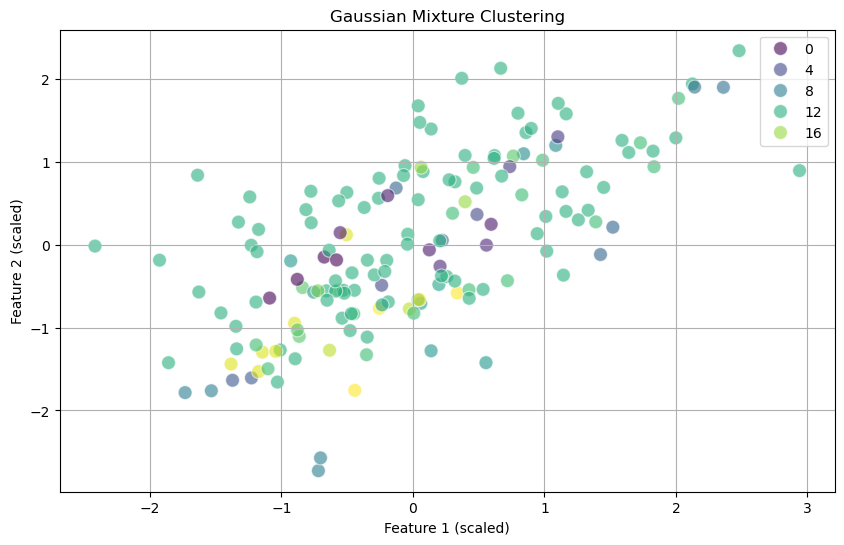

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_test_without[:, 0], y=scaled_test_without[:, 1], hue=labels, palette='viridis', s=100, alpha=0.6)
plt.title('Gaussian Mixture Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.grid()
plt.show()

In [45]:
scaler3 = StandardScaler()
Sd_wo_nan = scaler3.fit_transform(df_without_nan)

pca2 = PCA(n_components=2)
pca2.fit(Sd_wo_nan)

pca_sd_wo_nan = pca2.transform(Sd_wo_nan)

gmm.fit(Sd_wo_nan)
labels = gmm.predict(Sd_wo_nan)

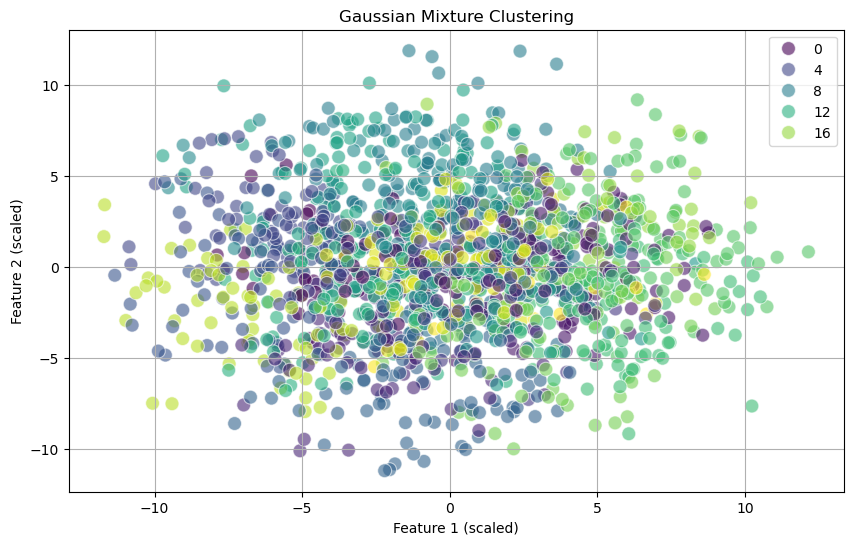

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_sd_wo_nan[:, 0], y=pca_sd_wo_nan[:, 1], hue=labels, palette='viridis', s=100, alpha=0.6)
plt.title('Gaussian Mixture Clustering')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.grid()
plt.show()

In [44]:
def create_scatter_plot(x, y, title="Scatter Plot", x_label="X-axis", y_label="Y-axis",
                        color='blue', size=50, alpha=0.7, grid=True, save_as=None):
    """
    Создает красивый scatter plot.

    :param x: Данные по оси x.
    :param y: Данные по оси y.
    :param title: Заголовок графика.
    :param x_label: Подпись оси x.
    :param y_label: Подпись оси y.
    :param color: Цвет точек.
    :param size: Размер точек.
    :param alpha: Прозрачность точек (от 0 до 1).
    :param grid: Показать или скрыть сетку.
    :param save_as: Имя файла для сохранения графика (если нужно).
    """
    plt.figure(figsize=(10, 6))
    
    # Используем Seaborn для стилизации
    sns.set(style="whitegrid")
    
    # Рисуем scatter plot
    plt.scatter(x, y, color=color, s=size, alpha=alpha)

    # Добавляем заголовки и подписи
    plt.title(title, fontsize=16)
    plt.xlabel(x_label, fontsize=14)
    plt.ylabel(y_label, fontsize=14)

    # Опционально добавляем сетку
    if grid:
        plt.grid(True)

    # Показать график или сохранить
    if save_as:
        plt.savefig(save_as, bbox_inches='tight')
    plt.show()


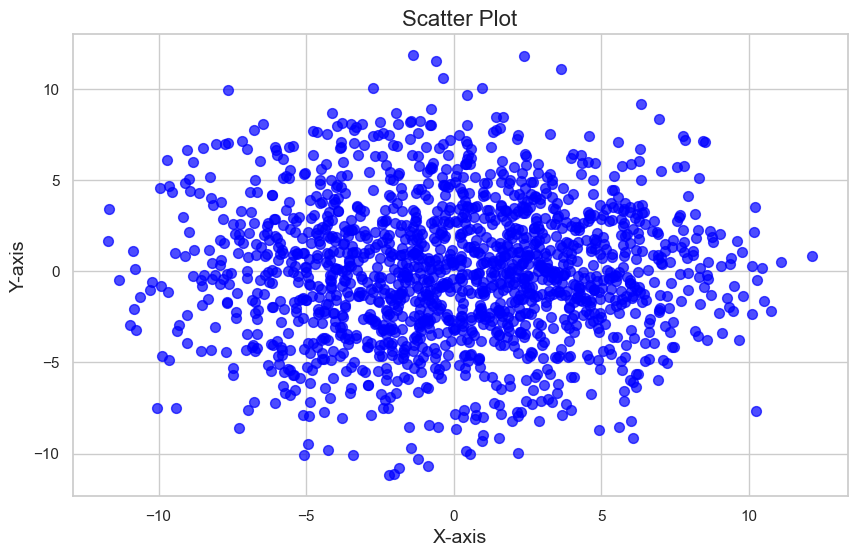

In [47]:
create_scatter_plot(x=pca_sd_wo_nan[:, 0], y=pca_sd_wo_nan[:, 1])